In [12]:
#https://www.unidata.ucar.edu/mailing_lists/archives/python-users/2017/msg00026.html
from calendar import monthrange
from datetime import datetime
import itertools

from netCDF4 import date2num, num2date
import numpy as np
from pyproj import Proj
from siphon.catalog import TDSCatalog
import xarray as xr

In [22]:
base_catalog = 'http://thredds.northwestknowledge.net:8080/thredds/catalog/NWCSC_INTEGRATED_SCENARIOS_ALL_CLIMATE/cfsv2_metdata_90day/catalog.xml'
main_cat = TDSCatalog(base_catalog)

In [41]:
fcst = ('00','06','12','18')
ensb = ('1','2','3','4')
day = ('0','1','2')
for tfcst, tensb, tday in itertools.product(fcst, ensb, day):
#     print(tfcst,tensb, tday)
    dsname = f'http://thredds.northwestknowledge.net:8080/thredds/dodsC/NWCSC_INTEGRATED_SCENARIOS_ALL_CLIMATE/cfsv2_metdata_90day/cfsv2_metdata_forecast_vs_daily_{tfcst}_{tensb}_{tday}.nc'
    fname = f'cfsv2_metdata_forecast_vs_daily_{tfcst}_{tensb}_{tday}.nc'
#     fobj = xr.open_dataset(dsname+'#fillmismatch')
    fobj = xr.open_dataset(dsname+'#fillmismatch', engine='netcdf4', mask_and_scale=True)
    fobj.to_netcdf(fname)
    
#     print(dsname)
#     ds = xr.open_dataset(main_cat.datasets[dsname].access_urls['OPENDAP'])
#     ds = xr.conventions.decode_cf(ds, mask_and_scale=False)
#     ds.to_netcdf(dsname)
#     fobj = main_cat.datasets.get(dsname).remote_access(service='OPENDAP', use_xarray=True)
#     fobj.to_netcdf(dsname)

In [59]:
import glob
paths = glob.glob("*_vs_*.nc")
# print(paths)
ds = xr.open_mfdataset(paths,combine='nested', concat_dim='time')

In [60]:
ds

,Array,Chunk
Bytes,4.98 GB,103.78 MB
Shape,"(48, 32, 585, 1386)","(1, 32, 585, 1386)"
Count,307 Tasks,48 Chunks
Type,float32,numpy.ndarray


In [61]:
mean_ws = np.mean(ds.wind_speed, axis=0)

In [62]:
mean_ws

<xarray.DataArray 'wind_speed' (day: 32, lat: 585, lon: 1386)>
dask.array<mean_agg-aggregate, shape=(32, 585, 1386), dtype=float32, chunksize=(32, 585, 1386), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * day      (day) datetime64[ns] 2020-09-26 2020-09-27 ... 2020-10-27
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06

C:\Users\rmcd\anaconda3\envs\bmi-CFS-DS\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


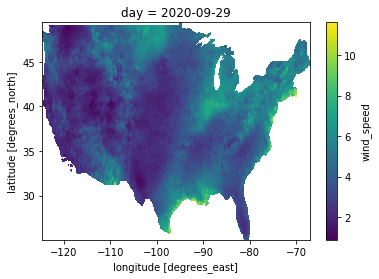

In [63]:
mean_ws[3,:,:].plot()

In [64]:
ds_1 = xr.open_dataset('cfsv2_metdata_forecast_vs_daily_00_1_0.nc')
ds_1

<xarray.Dataset>
Dimensions:     (crs: 1, day: 30, lat: 585, lon: 1386)
Coordinates:
  * lat         (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * day         (day) datetime64[ns] 2020-09-28 2020-09-29 ... 2020-10-27
  * crs         (crs) float32 3.0
  * lon         (lon) float64 -124.8 -124.7 -124.7 ... -67.14 -67.1 -67.06
Data variables:
    wind_speed  (day, lat, lon) float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decimal_degrees east
    coordinate_system:          EPSG:4326
    author:                     John Abatzoglou - University of Idaho, jabatz...
    date:                       27 September 2020
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    last_permanent_slice:       0
    last_early_slice:           30
    last_provisional_slice:     24
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

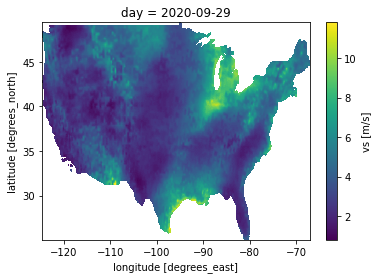

In [66]:
ds_1.wind_speed[1,:,:].plot()

In [67]:
import urllib

In [70]:
SCHEME = "http"
NETLOC = "thredds.northwestknowledge.net:8080"
PATH = '/thredds/ncss/grid/NWCSC_INTEGRATED_SCENARIOS_ALL_CLIMATE/cfsv2_metdata_90day/'
urllib.parse.urlunparse(
            (SCHEME, NETLOC, PATH, "", "", ""))

'http://thredds.northwestknowledge.net:8080/thredds/ncss/grid/NWCSC_INTEGRATED_SCENARIOS_ALL_CLIMATE/cfsv2_metdata_90day/'